Lab based on: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

# Step 1 : Reading and understanding Train and Test Data set¶


In [1]:
!pip install seaborn

In [2]:
#Loading Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

train_original = pd.read_csv("input/train_ctrUa4K.csv")
train = train_original
train.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Reading the name of columns in data set 
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test = pd.read_csv("input/test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#Reading the name of columns in data set 
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

# What are the data types present in the data?

R: Los tipos de datos presentes en la base de datos desde Gender hasta Self_Employed son de tipo object que en este caso representan una String, AplicantIncome y CoapplicantIncome son Integer, desde LoanAmount hasta Credit_History son Float y por último Property_Area es de tipo object (String).


# Univariate Analysis
It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable

## visualize features of the data set by graph and get the analysis

## Study categorical features such as Gender, Married, Self_Employed and Credit_History

## visualize the numerical variables: distribution of Applicant income first.

# Gender

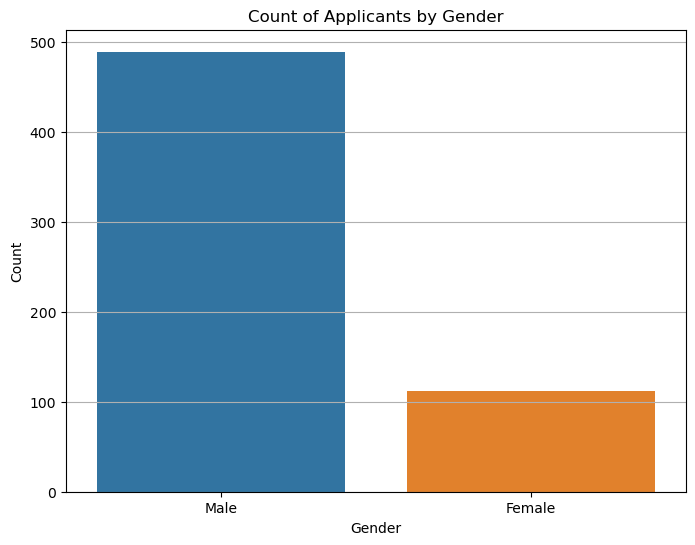

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=train_original)
plt.title('Count of Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [13]:
gender_frequency = train_original['Gender'].value_counts()
gender_frequency

Gender
Male      489
Female    112
Name: count, dtype: int64

# Married

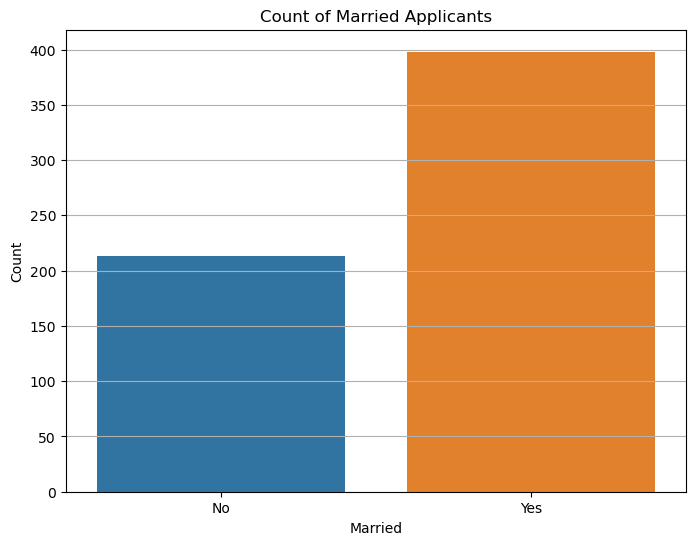

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', data=train_original)
plt.title('Count of Married Applicants')
plt.xlabel('Married')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [19]:
married_frequency = train_original['Married'].value_counts()
married_frequency

Married
Yes    398
No     213
Name: count, dtype: int64

# Self Employed

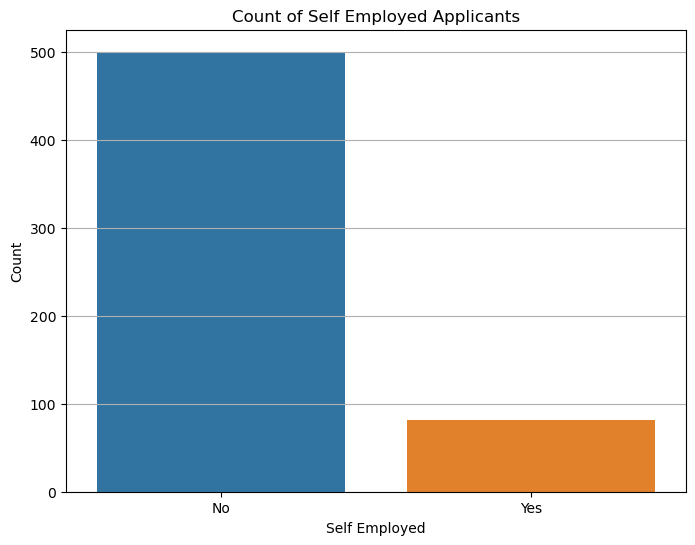

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Self_Employed', data=train_original)
plt.title('Count of Self Employed Applicants')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [18]:
self_employed_frequency = train_original['Self_Employed'].value_counts()
self_employed_frequency

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

# Credit History

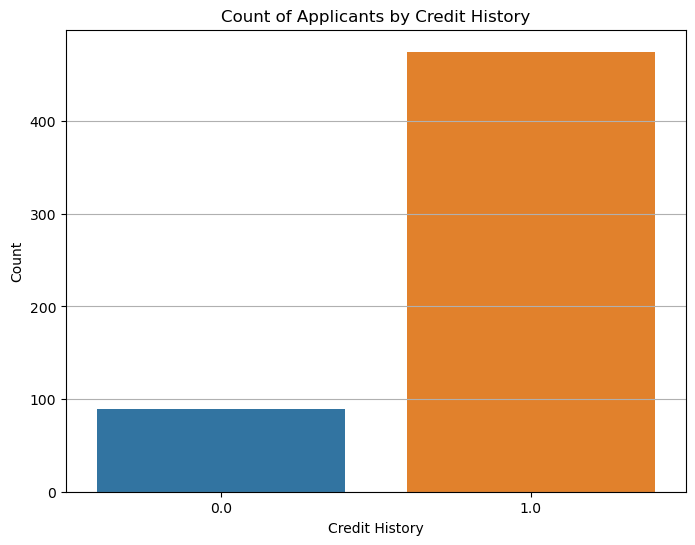

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', data=train_original)
plt.title('Count of Applicants by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [21]:
credit_history_frequency = train_original['Credit_History'].value_counts()
credit_history_frequency

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

# Applicant Income

C:\Users\samhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

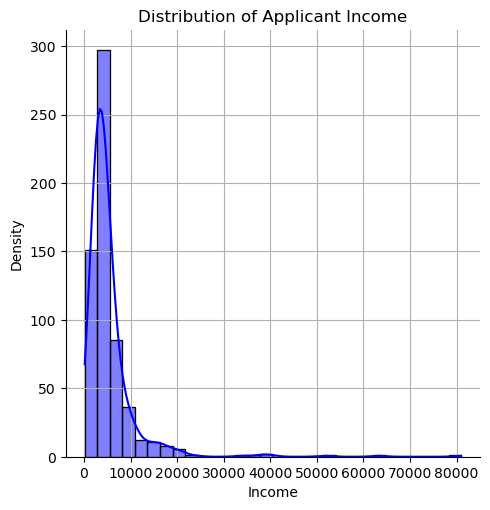

In [9]:
plt.figure(figsize=(10, 6))
sns.displot(train_original['ApplicantIncome'], kde=True, bins=30, color='blue')
plt.title('Distribution of Applicant Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [23]:
# Descriptive statistics for ApplicantIncome
applicant_income_stats = train_original['ApplicantIncome'].describe()

# Skewness and Kurtosis
skewness = train_original['ApplicantIncome'].skew()
kurtosis = train_original['ApplicantIncome'].kurt()

(applicant_income_stats, skewness, kurtosis)

(count      614.000000
 mean      5403.459283
 std       6109.041673
 min        150.000000
 25%       2877.500000
 50%       3812.500000
 75%       5795.000000
 max      81000.000000
 Name: ApplicantIncome, dtype: float64,
 6.539513113994625,
 60.54067593369113)

# Bivariate Analysis
Analyse the independent variable with respect to target variable. 

## Use bar plots to vizualice Gender vs Loan_Status, Education vs Loan_Status, Property_Area vs Loan_Status

## identify the most correlated variables to Loan_Status

## Identify, count and treat outliers and missing values

# Gender vs Loan Status

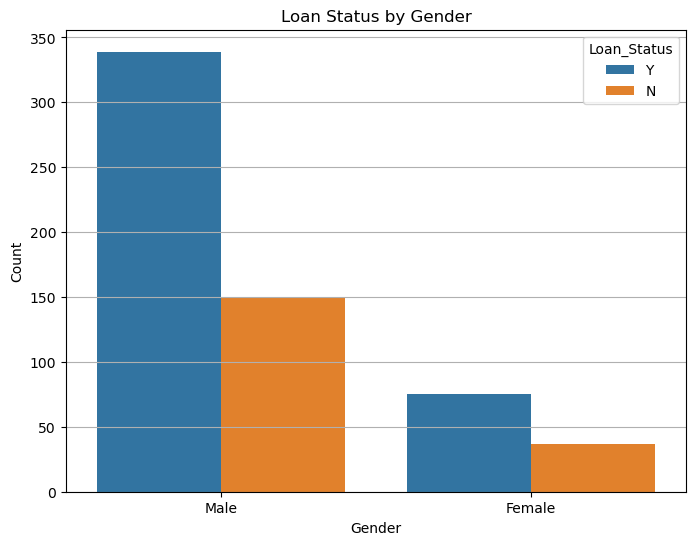

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=train_original)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [28]:
gender_loan_status = train_original.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack() * 100
gender_loan_status

Loan_Status,N,Y
Gender,,
Female,33.035714,66.964286
Male,30.674847,69.325153


# Education vs Loan Status

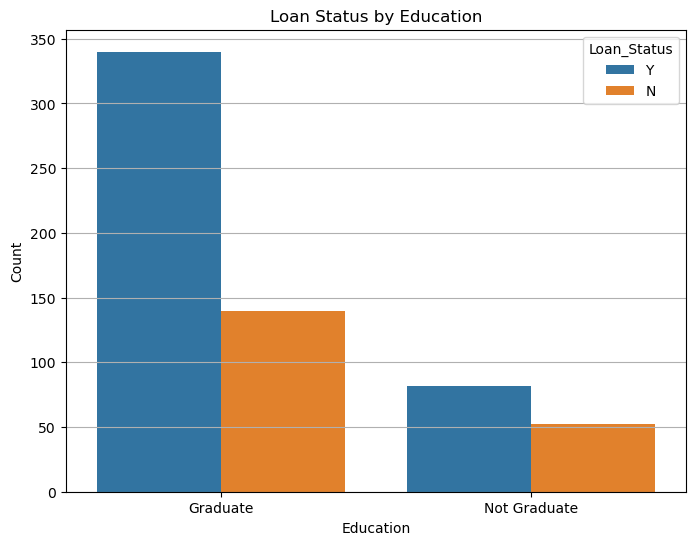

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=train_original)
plt.title('Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [29]:
education_loan_status = train_original.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack() * 100
education_loan_status

Loan_Status,N,Y
Education,,
Graduate,29.166667,70.833333
Not Graduate,38.805970,61.194030


# Property Area vs Loan Status

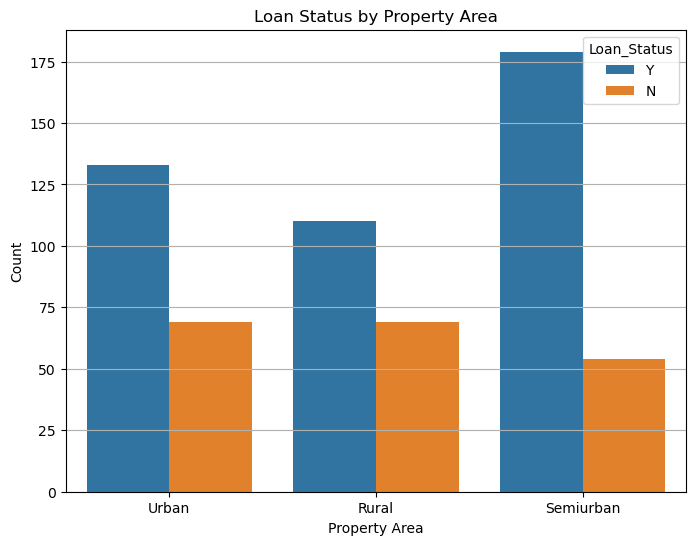

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_original)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [30]:
property_area_loan_status = train_original.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack() * 100
property_area_loan_status

Loan_Status,N,Y
Property_Area,,
Rural,38.547486,61.452514
Semiurban,23.175966,76.824034
Urban,34.158416,65.841584


# Model Building 

## Using the train dataset you should be able to select the best model. 
## Use feature selection
## Cross validation
## Try different models such as:

1) Decision Tree Classifier
2) Random Forest Classifier
3) K-Nearest-Neighbors
4) Support Vector Classifier
5) XGBoost

The test dataset doesn't have target. You are provided with a sample submition file. It is necesary to generate such a file with the two best models you have and attach it to your report. 